## 一元线性回归

以一元为例，$y=w_1x_1+b=w^Tb=w_1x_1+w_0x_0$, 实际使用梯度下降法时可以令$x_0=0$,则求出的$w_0=b$

### 梯度下降法

![jupyter](./BGD.png)

输出参数w: [[1.42719063]]
输出参数:b [0.2380875]


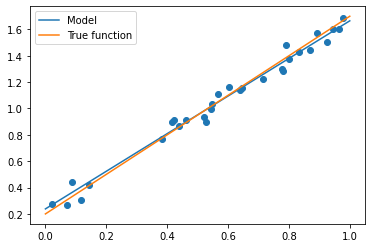

In [34]:
import numpy as np
import matplotlib.pyplot as plt


def true_fun(X):
    return 1.5*X + 0.2

np.random.seed(0) # 随机种子
n_samples = 30
'''生成随机数据作为训练集'''
train_X = np.sort(np.random.rand(n_samples)) 
train_y = (true_fun(train_X) + np.random.randn(n_samples) * 0.05).reshape(n_samples,1)
data_X = []
for x in train_X:
    data_X.append([1,x])
data_X = np.array((data_X))
maxiter = 200
m,n = shape(data_X)
weights = ones((n,1))
alpha = 0.01 # 学习率
for i in range(0,maxiter):
    hypothesis = np.dot(data_X,weights)
    error = (hypothesis-train_y)
    gradient = data_X.transpose().dot(error)
    weights = weights - alpha * gradient
print("输出参数w:",weights[1:]) # 输出模型参数w
print("输出参数:b",weights[0]) # 输出参数b


test_X = np.linspace(0, 1, 100)
plt.plot(test_X, test_X*weights[1][0]+weights[0][0], label="Model")
plt.plot(test_X, true_fun(test_X), label="True function")
plt.scatter(train_X,train_y) # 画出训练集的点
plt.legend(loc="best")

## scikit-learn
scikit-learn，简称sklearn，是一个开源的基于python语言的机器学习工具包。它通过NumPy, SciPy和Matplotlib等python数值计算的库实现高效的算法应用，并且涵盖了几乎所有主流机器学习算法。

官网：https://scikit-learn.org/stable/index.html

输出参数w: [1.4474774]
输出参数:b 0.22557541560416694


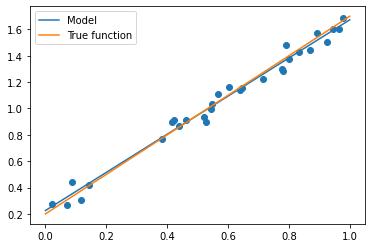

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression # 导入线性回归模型
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def true_fun(X):
    return 1.5*X + 0.2

np.random.seed(0) # 随机种子
n_samples = 30
'''生成随机数据作为训练集'''
train_X = np.sort(np.random.rand(n_samples)) 
train_y = true_fun(train_X) + np.random.randn(n_samples) * 0.05

model = LinearRegression() # 定义模型
model.fit(train_X[:,np.newaxis], train_y) # 训练模型

print("输出参数w:",model.coef_) # 输出模型参数w
print("输出参数:b",model.intercept_) # 输出参数b

test_X = np.linspace(0, 1, 100)
plt.plot(test_X, model.predict(test_X[:, np.newaxis]), label="Model")
plt.plot(test_X, true_fun(test_X), label="True function")
plt.scatter(train_X,train_y) # 画出训练集的点
plt.legend(loc="best")

## 多元线性回归

以三元为例，$y=w_1x_1+w_2x_2+w_3x_3+b=w^Tb$

In [34]:
from sklearn.linear_model import LinearRegression

X = [[1,1,1],[1,1,2],[1,2,1]]
y = [[6],[9],[8]]
 
model = LinearRegression()
model.fit(X, y)
print("输出参数w:",model.coef_) # 输出参数w1,w2,w3
print("输出参数b:",model.intercept_) # 输出参数b
test_X = [[1,3,5]]
pred_y = model.predict(test_X)
print("预测结果:",pred_y)

输出参数w: [[0. 2. 3.]]
输出参数b: [1.]
预测结果: [[22.]]


## 多项式回归以及过拟合与欠拟合



### 训练集
用来训练模型内参数的数据集

### 验证集
用于在训练过程中检验模型的状态，收敛情况，通常用于调整超参数，根据几组模型验证集上的表现决定哪组超参数拥有最好的性能。

同时验证集在训练过程中还可以用来监控模型是否发生过拟合，一般来说验证集表现稳定后，若继续训练，训练集表现还会继续上升，但是验证集会出现不升反降的情况，这样一般就发生了过拟合。所以验证集也用来判断何时停止训练

### 测试集
测试集用来评价模型泛化能力，即使用训练集调整了参数，之前模型使用验证集确定了超参数，最后使用一个不同的数据集来检查模型。

### 交叉验证

交叉验证法的作用就是尝试利用不同的训练集/测试集划分来对模型做多组不同的训练/测试，来应对测试结果过于片面以及训练数据不足的问题。

![jupyter](./cross_valid.png)





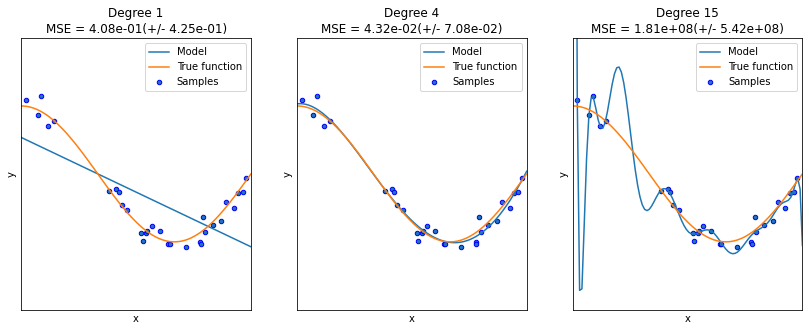

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15] # 多项式最高次

X = np.sort(np.random.rand(n_samples)) 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)]) # 使用pipline串联模型
    pipeline.fit(X[:, np.newaxis], y)

    # 使用交叉验证
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()